## Solución guía 3 grupo 1:
Presentado por:
*   MAGDA YANETH OROZCO GARCIA 46457994
*   SEBASTIAN CORZO PENHA 1018489947
*   JOSÉ NÉSTOR SUÁREZ SUÁREZ 19365283
*   JUAN JOSÉ VARGAS VÉLEZ 1088008834

In [ ]:
# Instalar Pandas
# pip install pandas
# Importar y comprobar versión
import pandas as pd
print(pd.__version__)

2.2.2


In [ ]:
import os
os.getcwd()
os.makedirs('Guía3', exist_ok=True)

In [ ]:
df = pd.read_csv('/content/Guía3/accidents-1.csv', sep=";")

In [10]:
df.head(5)

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/26/2018,12:12,BRONX,10454.0,40.808987,-73.911316,NaN,0,0,0,...,NaN,NaN,NaN,NaN,3988123,Sedan,NaN,NaN,NaN,NaN
1,09/25/2018,16:30,BROOKLYN,11236.0,40.636005,-73.912510,FLATLANDS AVENUE,1,0,0,...,NaN,NaN,NaN,NaN,3987962,Sedan,NaN,NaN,NaN,NaN
2,08/22/2019,19:30,QUEENS,11101.0,40.755490,-73.939530,NaN,0,0,0,...,NaN,NaN,NaN,NaN,4193132,Sedan,NaN,NaN,NaN,NaN
3,09/23/2018,13:10,QUEENS,11367.0,NaN,NaN,MAIN STREET,0,0,1,...,Unspecified,NaN,NaN,NaN,3985962,Bike,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
4,08/20/2019,22:40,BRONX,10468.0,40.868336,-73.901270,NaN,0,0,0,...,Unspecified,NaN,NaN,NaN,4192111,Sedan,Sedan,NaN,NaN,NaN


In [12]:
df.shape
print(f"El Dataframe está compuesto por {df.shape} filas y columnas respectivamente")

El Dataframe está compuesto por (238522, 24) filas y columnas respectivamente


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238522 entries, 0 to 238521
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   DATE                           238522 non-null  object 
 1   TIME                           238522 non-null  object 
 2   BOROUGH                        238522 non-null  object 
 3   ZIP CODE                       238452 non-null  float64
 4   LATITUDE                       231544 non-null  float64
 5   LONGITUDE                      231544 non-null  float64
 6   ON STREET NAME                 153918 non-null  object 
 7   NUMBER OF PEDESTRIANS INJURED  238522 non-null  int64  
 8   NUMBER OF PEDESTRIANS KILLED   238522 non-null  int64  
 9   NUMBER OF CYCLIST INJURED      238522 non-null  int64  
 10  NUMBER OF CYCLIST KILLED       238522 non-null  int64  
 11  NUMBER OF MOTORIST INJURED     238522 non-null  int64  
 12  NUMBER OF MOTORIST KILLED     

# Limpieza e imputación de datos

In [14]:
import pandas as pd
import numpy as np

# Contar valores nulos por columna
missing_values = df.isnull().sum()

# Mostrar columnas con valores nulos
missing_values[missing_values > 0]

# ya teniendo las columnas con valores faltantes, hacemos la imputacion de datos

#Imputar ZIP CODE con la moda dentro de cada municipio
df["ZIP CODE"] = df.groupby("BOROUGH")["ZIP CODE"].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "Unknown"))

#Imputar LATITUDE y LONGITUDE con la media dentro de cada municipio
df["LATITUDE"] = df.groupby("BOROUGH")["LATITUDE"].transform(lambda x: x.fillna(x.mean()))
df["LONGITUDE"] = df.groupby("BOROUGH")["LONGITUDE"].transform(lambda x: x.fillna(x.mean()))

#se Reemplazan valores nulos en ON STREET NAME con "UNKNOWN"
df["ON STREET NAME"] = df["ON STREET NAME"].fillna("UNKNOWN")

# Reemplazar valores nulos en los factores contribuyentes con "Unspecified"
factor_columns = [col for col in df.columns if "CONTRIBUTING FACTOR VEHICLE" in col]
df[factor_columns] = df[factor_columns].fillna("Unspecified")

#Reemplazar valores nulos en VEHICLE TYPE CODE con "Unknown"
vehicle_columns = [col for col in df.columns if "VEHICLE TYPE CODE" in col]
df[vehicle_columns] = df[vehicle_columns].fillna("Unknown")

# Verificar si aún quedan valores nulos
missing_values_after = df.isnull().sum()
missing_values_after[missing_values_after > 0]  # Debería devolver un resultado vacío


,0


# Línea para guardar el DF modificado

In [15]:
# Guardar el DataFrame en un archivo CSV
df.to_csv("/content/Guía3/datos_modificados.csv", index=False)

# Descargar el archivo a tu computadora
from google.colab import files
files.download("/content/Guía3/datos_modificados.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Ejercicio 1

Desde 2014, la ciudad de Nueva York ha estado implementando el programa de seguridad vial Vision Zero, cuyo objetivo es reducir a cero el número de muertes por accidentes de tránsito para el año 2024. Como parte de esta iniciativa, se han implementado y mejorado diversas estrategias para aumentar la seguridad en las calles.

A continuación, se presentan algunas de las medidas adoptadas en el plan:

- [X] Detección automatizada de peatones para mejorar la seguridad en los cruces.
- [ ] Auditorías de seguridad vial en zonas con alta incidencia de accidentes.
- [X] Expansión de la red de carriles para bicicletas para reducir la exposición de ciclistas a incidentes con vehículos.
- [ ] Programas de educación y sensibilización para fomentar el respeto a las normas de tránsito.
- [X] Construcción de islas de refugio peatonal para mejorar la seguridad en calles de alto tráfico.
- [X] Implementación de reductores de velocidad inteligentes, como topes y amortiguadores, basados en el análisis de datos.

**Pregunta: ¿Cuáles de estas iniciativas podrían beneficiarse directamente del análisis de los datos disponibles sobre accidentes? Marque todas las opciones que considere aplicables.**

Instrucciones: Para marcar una opción, agregue una "[x]" en la casilla correspondiente.

# **Respuesta**
Se tendría una poderación de peatones que se subclasificaría en: lesionados, vivos y muertos. Se podrían realizar programas específicos para la accidentalidad y programas secundarios para construcción de estrategias de seguridad y educación. **

### Ejercicio 2:

Agrupe los datos disponibles mensualmente y genere un line plot de accidentes a lo largo del tiempo. ¿Ha aumentado el número de accidentes durante el último año y medio?

**Sugerencia**: Puede encontrar útiles las funciones de pandas ```to_datetime ()``` y ```dt.to_period ()```.


In [16]:
# Convertir la columna 'DATE' a tipo datetime
df['DATE'] = pd.to_datetime(df['DATE'])
df['DATE'].head()

,DATE
0,2018-09-26
1,2018-09-25
2,2019-08-22
3,2018-09-23
4,2019-08-20


In [17]:
# Convertir fechas a períodos mensuales (dt.to_period)
df['Periodo Mensual'] = df['DATE'].dt.to_period('M')  # 'M' representa mes
df["Periodo Mensual"].head()

,Periodo Mensual
0,2018-09
1,2018-09
2,2019-08
3,2018-09
4,2019-08


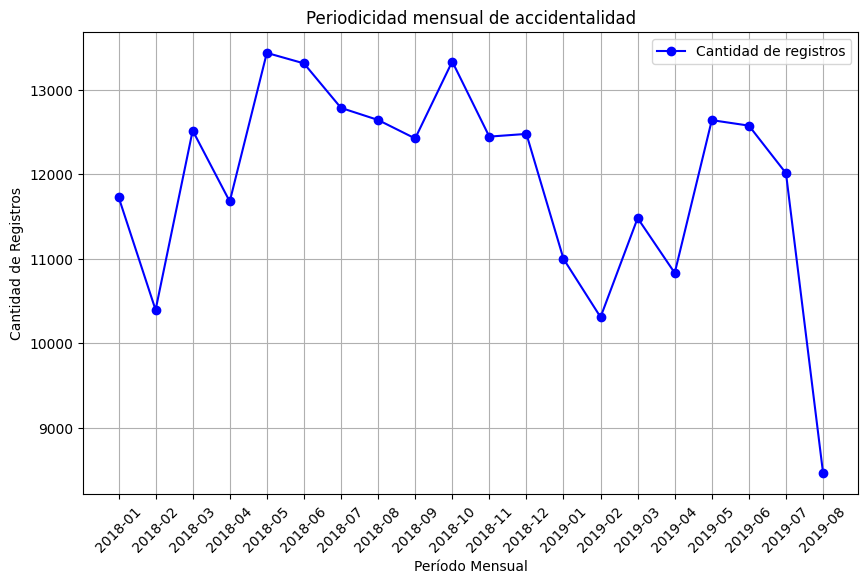

,BOROUGH
Periodo Mensual,
2019-08,8466
2019-02,10310
2018-02,10395


In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# Contar la cantidad de registros por periodo mensual
conteo_por_periodo = df.groupby('Periodo Mensual')['BOROUGH'].count()

# Crear la figura y la línea
plt.figure(figsize=(10, 6))
plt.plot(conteo_por_periodo.index.astype(str), conteo_por_periodo.values, marker='o', linestyle='-', color='b', label="Cantidad de registros")

# Configurar etiquetas y título
plt.xlabel('Período Mensual')
plt.ylabel('Cantidad de Registros')
plt.title('Periodicidad mensual de accidentalidad')
plt.xticks(rotation=45)  # Rotar etiquetas del eje X
plt.legend(loc="best")
plt.grid()

# Mostrar el gráfico
plt.show()

conteo_por_periodo.sort_values().head(3)


El gráfico de líneas que trazamos muestra claramente que no hay una tendencia alcista obvia en los accidentes a lo largo del tiempo.

De la gráfica anterior, ¿qué meses parecen tener el menor número de accidentes? ¿Cuáles crees que son las razones detrás de esto?

# **Respuesta**

Los tres meses con menor número de registros son: febrero de 2018, febrero de 2019 y agosto de 2019. La disminución de cantidad de registros puede deberse a que algunas de las estrategias implementadas hayan funcionado, tales como:
1.    Implementación de reductores de velocidad inteligentes, como topes y amortiguadores, basados en el análisis de datos.
  
2.   Expansión de la red de carriles para bicicletas para reducir la exposición de ciclistas a incidentes con vehículos.

### Ejercicio 3:
¿Cómo varía el número de accidentes a lo largo de un solo día? Cree una nueva columna `HOUR` basada en los datos de la columna `TIME`, luego trace un gráfico de barras de la distribución por hora a lo largo del día.

**Sugerencia:** Puede encontrar útil la función ```dt.hour```.

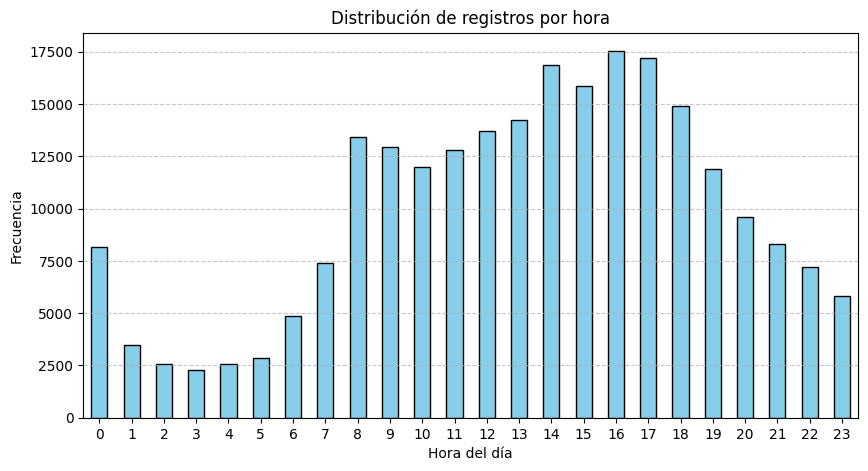

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertir la columna TIME a formato datetime
df['TIME'] = pd.to_datetime(df['TIME'])

# Extraer la hora y crear la nueva columna HOUR
df['HOUR'] = df['TIME'].dt.hour

# Contar la cantidad de ocurrencias por hora
ocurrencias_por_hora = df['HOUR'].value_counts().sort_index()

# Graficar la distribución de registros por hora
plt.figure(figsize=(10, 5))
ocurrencias_por_hora.plot(kind='bar', color='skyblue', edgecolor='black')

# Configurar etiquetas y título
plt.xlabel('Hora del día')
plt.ylabel('Frecuencia')
plt.title('Distribución de registros por hora')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)

# Mostrar la gráfica
plt.show()

# Top 3 de las horas con mayor cantidad de registros por hora
# df['HOUR'].value_counts().sort_values(ascending=False).head(3)

En la pregunta anterior hemos agregado el número de accidentes por hora sin tener en cuenta la fecha y el lugar en que ocurrieron. ¿Qué crítica le daría a este enfoque?

# **Respuesta**

La fecha y el lugar son importantes para explicar la causalidad de la accidentalidad. Generalmente, son fechas festivas y sitios de alto flujo vehicular.  

### Ejercicio 4:

¿Cómo varía el número de accidentes en una sola semana? Trace un gráfico de barras basado en el recuento de accidentes por día de la semana.

**Sugerencia:** Puede encontrar útil la función ```dt.weekday```.

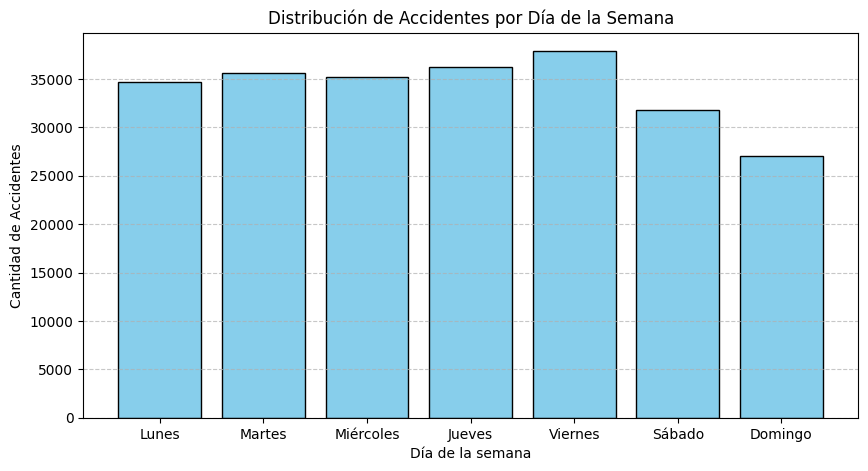

,count
DIA,
0,34719
1,35651
2,35188
3,36254
4,37886
5,31784
6,27040


In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Extraer el día de la semana (0=Lunes, 6=Domingo)
df['DIA'] = df['DATE'].dt.weekday

# Mapeo de números a nombres de días
dias_semana = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

# Contar la cantidad de ocurrencias por día (asegurando que los días estén ordenados correctamente)
ocurrencias_por_dia = df['DIA'].value_counts().reindex(range(7), fill_value=0)

# Crear la figura
plt.figure(figsize=(10, 5))
plt.bar(dias_semana, ocurrencias_por_dia.values, color='skyblue', edgecolor='black')

# Configurar etiquetas y título
plt.xlabel('Día de la semana')
plt.ylabel('Cantidad de Accidentes')
plt.title('Distribución de Accidentes por Día de la Semana')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar la gráfica
plt.show()

# Mostrar tabla con la data
df['DIA'].value_counts().reindex(range(7), fill_value=0)

### Ejercicio 5:

Trace una gráfica de barras del número total de accidentes en cada municipio, así como uno de los accidentes por milla cuadrada por municipio. ¿Qué puedes concluir?

**Sugerencia:** Es posible que desee actualizar algunas de las claves en el diccionario del municipio para que coincidan con los nombres en el marco de datos.

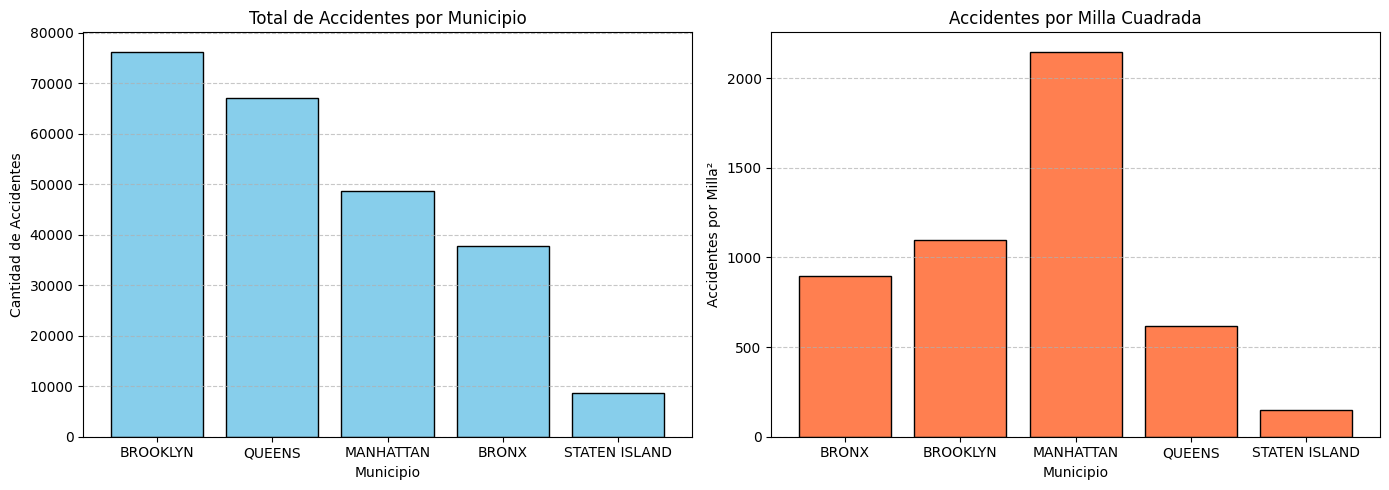

(BOROUGH
 BROOKLYN         76253
 QUEENS           67120
 MANHATTAN        48749
 BRONX            37709
 STATEN ISLAND     8691
 Name: count, dtype: int64,
 BRONX             893.578199
 BROOKLYN         1098.746398
 MANHATTAN        2147.533040
 QUEENS            617.479301
 STATEN ISLAND     151.147826
 dtype: float64)

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Diccionario con el área de cada municipio en millas cuadradas
area = {
    "BRONX": 42.2,
    "BROOKLYN": 69.4,
    "MANHATTAN": 22.7,
    "QUEENS": 108.7,
    "STATEN ISLAND": 57.5
}

# Contar la cantidad de ocurrencias por municipio
ocurrencias_por_municipio = df['BOROUGH'].value_counts()

# Calcular accidentes por milla cuadrada
accidentes_por_milla = ocurrencias_por_municipio / pd.Series(area)

# Crear la figura con dos gráficos
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico 1: Total de accidentes por municipio
axes[0].bar(ocurrencias_por_municipio.index, ocurrencias_por_municipio.values,
            color='skyblue', edgecolor='black')
axes[0].set_title('Total de Accidentes por Municipio')
axes[0].set_xlabel('Municipio')
axes[0].set_ylabel('Cantidad de Accidentes')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Gráfico 2: Accidentes por milla cuadrada
axes[1].bar(accidentes_por_milla.index, accidentes_por_milla.values,
            color='coral', edgecolor='black')
axes[1].set_title('Accidentes por Milla Cuadrada')
axes[1].set_xlabel('Municipio')
axes[1].set_ylabel('Accidentes por Milla²')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Ajustar espacio entre gráficos
plt.tight_layout()

# Mostrar gráficos
plt.show()

ocurrencias_por_municipio, accidentes_por_milla

# **Respuesta**

Aún cuando MANHATTAN tiene un área intermedia (22.7 milla^2) es el municipio con mayor accidentalidad (2147.5 registros)

### Ejercicio 6:

¿Qué horas tienen más accidentes en cada municipio? Trace un gráfico de barras para cada municipio que muestre el número de accidentes por cada hora del día.

**Sugerencia:** Puede usar ```sns.FacetGrid``` para crear una cuadrícula de parcelas con los datos por hora de cada municipio.

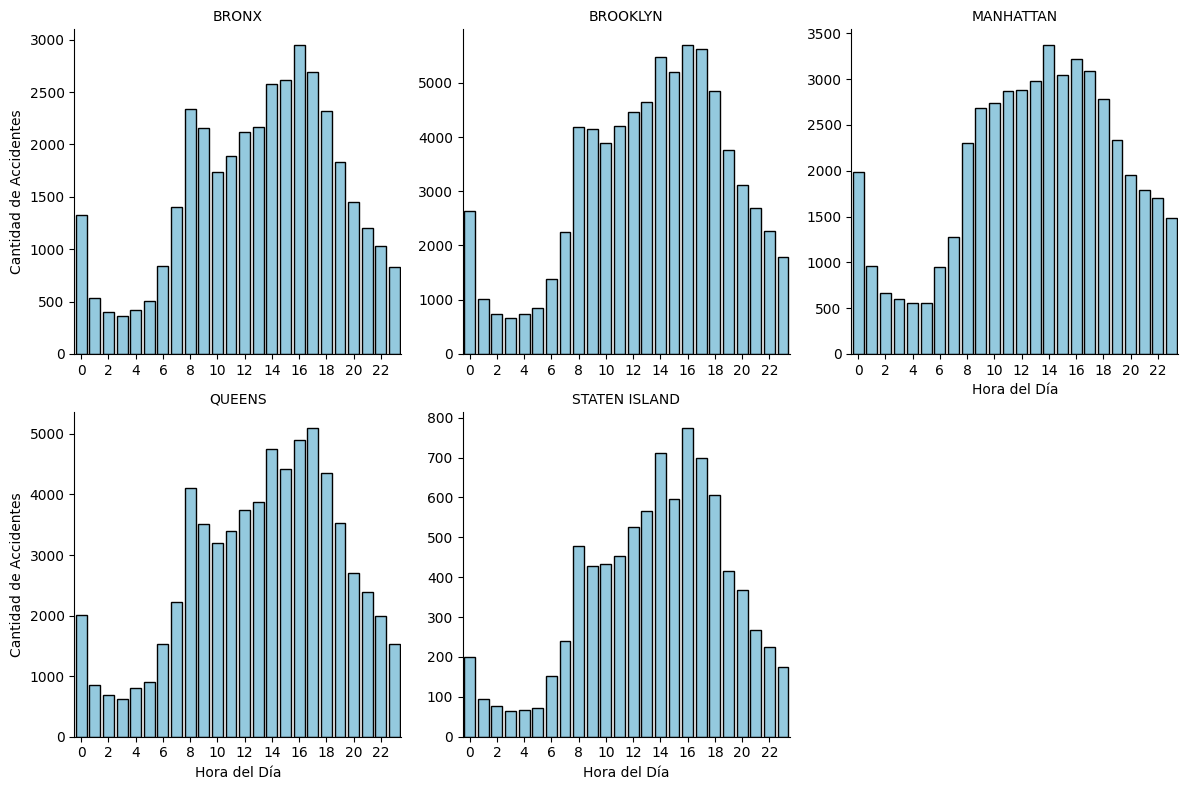

,BOROUGH,HOUR,COUNT
5,BROOKLYN,16,5701
3,BROOKLYN,14,5480
4,BROOKLYN,15,5208
11,QUEENS,16,4893
9,QUEENS,14,4746
10,QUEENS,15,4421
6,MANHATTAN,14,3375
8,MANHATTAN,16,3215
7,MANHATTAN,15,3045
2,BRONX,16,2952


In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Asegurar que TIME es de tipo datetime
df['TIME'] = pd.to_datetime(df['TIME'])

# Extraer la hora y agregar una nueva columna
df['HOUR'] = df['TIME'].dt.hour

# Agrupar por municipio y hora para contar accidentes
accidentes_por_municipio_por_hora = df.groupby(['BOROUGH', 'HOUR']).size().reset_index(name='COUNT')

# Crear el FacetGrid con un gráfico por municipio
g = sns.FacetGrid(accidentes_por_municipio_por_hora, col="BOROUGH", col_wrap=3, height=4, sharex=False, sharey=False)

# Dibujar gráficos de líneas
g.map_dataframe(sns.barplot, x="HOUR", y="COUNT", color="skyblue", edgecolor="black")

# Configurar etiquetas y títulos
g.set_axis_labels("Hora del Día", "Cantidad de Accidentes")
g.set_titles(col_template="{col_name}")  # Nombre del municipio en cada gráfico

for ax in g.axes.flat:
    ax.set_xticks(range(0, 24, 2))  # Mostrar cada 2 horas

# Mostrar el gráfico
plt.show()

# Filtrar entre las 14 y 16 horas (incluyendo 14, 15 y 16)
df_filtrado = df[(df['HOUR'] >= 14) & (df['HOUR'] <= 16)]

# Agrupar por municipio y hora para contar accidentes
filtrado = df_filtrado.groupby(['BOROUGH', 'HOUR']).size().reset_index(name='COUNT')
filtrado = filtrado.sort_values(by='COUNT', ascending=False)
filtrado

**¿Es mayor el número de accidentes en diferentes momentos en diferentes distritos? ¿Deberíamos concentrarnos en diferentes momentos para cada municipio?**

# **Respuesta**

Las horas con mayor cantidad de registros en todos los municipios son entre las 14 y 16. Ver tabla impresa arriba.

### Ejercicio 7:

¿Qué factores provocan la mayoría de los accidentes? Evite contar dos veces los factores que contribuyen a un solo accidente.

**Sugerencia:** Una forma de lidiar con las repeticiones es concatenar las columnas correspondientes conservando sus índices, puede hacerlo con las funciones ```pd.concat()``` y ```reset_index()```. Luego, use un ```group_by``` apropiado para contar el número de repeticiones de factores contribuidos por accidente.

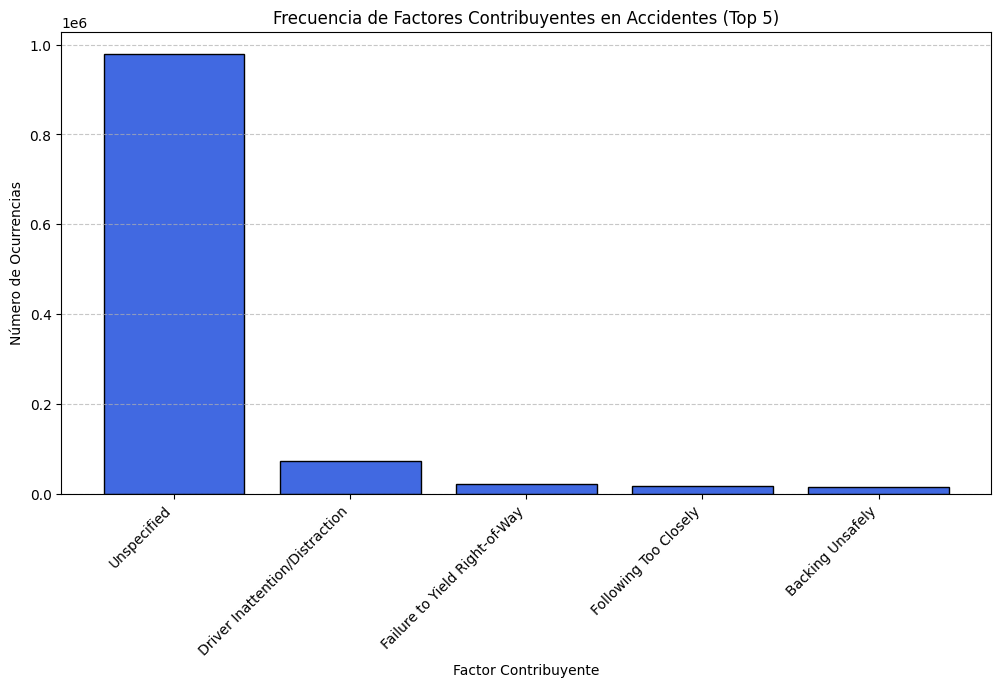

,count
Unspecified,979902
Driver Inattention/Distraction,72203
Failure to Yield Right-of-Way,20413
Following Too Closely,17909
Backing Unsafely,15068


In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Concatenar las columnas en una sola Serie (unir en forma de columna)
factores_accidentes = pd.concat([
    df["CONTRIBUTING FACTOR VEHICLE 1"],
    df["CONTRIBUTING FACTOR VEHICLE 2"],
    df["CONTRIBUTING FACTOR VEHICLE 3"],
    df["CONTRIBUTING FACTOR VEHICLE 4"],
    df["CONTRIBUTING FACTOR VEHICLE 5"]
])

# Contar la cantidad de veces que aparece cada factor contribuyente
conteo_factores = factores_accidentes.value_counts()

# Seleccionar los 5 factores más comunes
top_factores = conteo_factores.head(5)

# Crear gráfico de barras verticales
plt.figure(figsize=(12, 6))
plt.bar(top_factores.index, top_factores.values, color="royalblue", edgecolor="black")

# Personalizar el gráfico
plt.xlabel("Factor Contribuyente")
plt.ylabel("Número de Ocurrencias")
plt.title("Frecuencia de Factores Contribuyentes en Accidentes (Top 5)")
plt.xticks(rotation=45, ha="right")  # Rotar etiquetas para mejor lectura
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Mostrar gráfico
plt.show()

# top 5 factores
factores_accidentes.value_counts().head(5)

# **Respuesta**

El top 5 de factores contribuyentes → ver impreso arriba.

### Ejercicio 8:

¿Qué tipos de vehículos están más involucrados en accidentes por municipio? Evite contar dos veces el tipo de vehículos presentes en un solo accidente.

**Sugerencia:** Puede aplicar un enfoque similar al utilizado en la pregunta anterior.

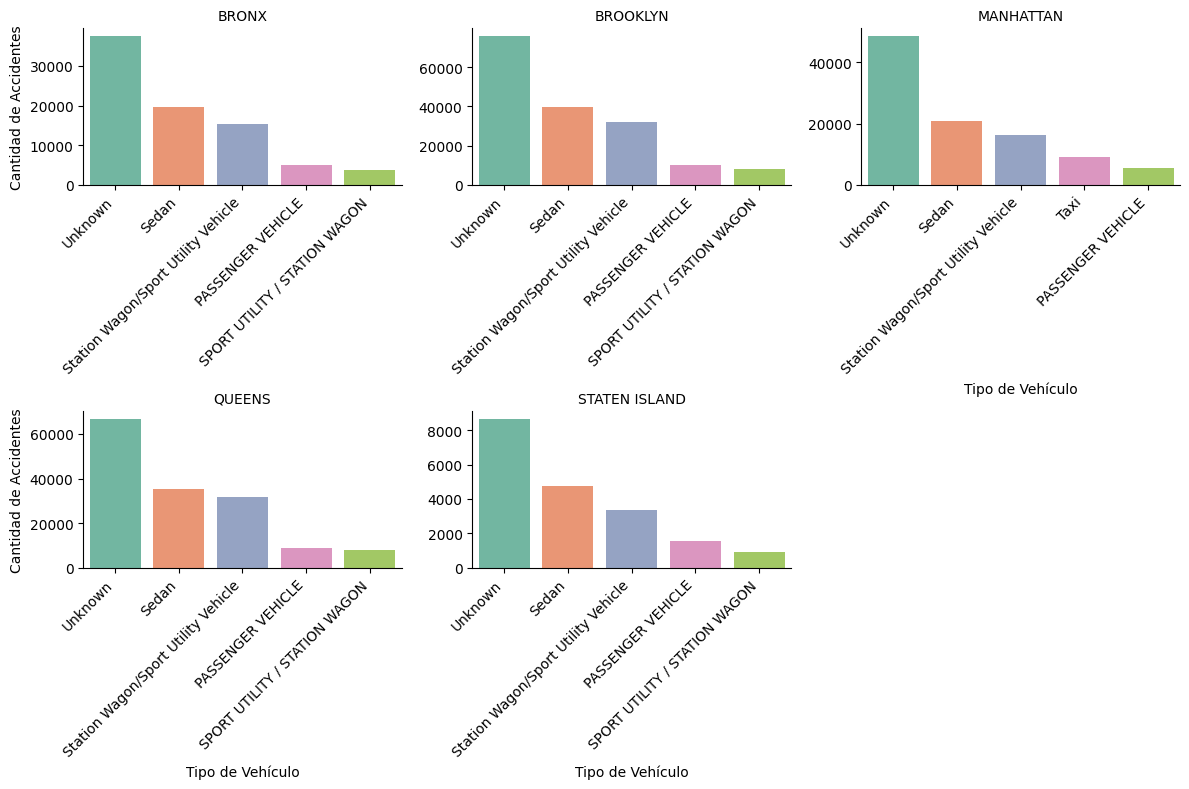

,BOROUGH,TIPOS_VEHICULOS,COUNT
232,BRONX,Unknown,37593
181,BRONX,Sedan,19652
185,BRONX,Station Wagon/Sport Utility Vehicle,15434
561,BROOKLYN,Unknown,75959
511,BROOKLYN,Sedan,39459
519,BROOKLYN,Station Wagon/Sport Utility Vehicle,32262
913,MANHATTAN,Unknown,48678
868,MANHATTAN,Sedan,20727
873,MANHATTAN,Station Wagon/Sport Utility Vehicle,16432
1208,QUEENS,Unknown,66870


In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una nueva columna con los tipos de vehículos como un conjunto (evita duplicados en el mismo accidente)
df["TIPOS_VEHICULOS"] = df[[
    "VEHICLE TYPE CODE 1", "VEHICLE TYPE CODE 2",
    "VEHICLE TYPE CODE 3", "VEHICLE TYPE CODE 4",
    "VEHICLE TYPE CODE 5"
]].apply(lambda x: set(x.dropna()), axis=1)

# Expandir la lista en filas individuales, manteniendo la relación con el municipio
df_exploded = df.explode("TIPOS_VEHICULOS")

# Contar los tipos de vehículos únicos involucrados por municipio
conteo_vehiculos = df_exploded.groupby(["BOROUGH", "TIPOS_VEHICULOS"]).size().reset_index(name="COUNT")

# Seleccionar los 5 tipos de vehículos más comunes en cada municipio
top5_por_municipio = conteo_vehiculos.sort_values(["BOROUGH", "COUNT"], ascending=[True, False])
top5_por_municipio = top5_por_municipio.groupby("BOROUGH").head(5)

# Crear una cuadrícula de gráficos con FacetGrid (uno por cada municipio)
g = sns.FacetGrid(top5_por_municipio, col="BOROUGH", col_wrap=3, sharex=False, sharey=False, height=4)

# Dibujar los gráficos de barras en la cuadrícula
g.map_dataframe(sns.barplot, x="TIPOS_VEHICULOS", y="COUNT", hue="TIPOS_VEHICULOS", dodge=False, legend=False, palette="Set2")

# Girar etiquetas del eje X 45°
for ax in g.axes.flat:
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

# Ajustar etiquetas y diseño
g.set_axis_labels("Tipo de Vehículo", "Cantidad de Accidentes")
g.set_titles(col_template="{col_name}")
plt.tight_layout()
plt.show()

top5_por_municipio.groupby("BOROUGH").head(3)

# **Respuesta**

Los tres tipos de vehículos más involucrados en todos los municipios son:


1.   Unknown
2.   Sedan
3.   Station Wagon/Sport Utility Vehicle

### Ejercicio 9:

En 2018 para una [entrevista](https://www.nytimes.com/2019/01/01/nyregion/traffic-deaths-decrease-nyc.html) con The New York Times, el alcalde de Blasio de Nueva York declaró que *'Vision Zero está funcionando claramente'*. Ese año, el número de muertes en accidentes de tráfico en Nueva York se redujo a un histórico 202. Sin embargo, según lo informado por [am New York Metro](https://www.amny.com/news/vision-zero-de-blasio- 1-30707464 /), el número de víctimas mortales ha aumentado un 30% en el primer trimestre de 2019 en comparación con el año anterior y el número de peatones y ciclistas heridos no ha experimentado ninguna mejora.

¿Cómo utilizaría los datos proporcionados para comprender qué salió mal en el primer trimestre de 2019?


> - [X] Considere los accidentes del primer trimestre de 2019. Luego, busque las causas más comunes de accidentes en los que estuvieron involucrados peatones y ciclistas. Dé una recomendación basada únicamente en esta información.

> - [ ] Cree un par de mapas de calor de los accidentes que involucraron a peatones y ciclistas lesionados / muertos en el primer trimestre de 2018 y 2019. Compare estos dos para ver si hay algún cambio en la concentración de accidentes. En áreas críticas, estudie el tipo de factores involucrados en los accidentes. Dé una recomendación para visitar estas áreas para estudiar más el problema.   

> - [ ] Los datos proporcionados son insuficientes para mejorar nuestra comprensión de la situación.

> - [ ] Ninguna de las anteriores. Haría lo siguiente: *aquí tu respuesta recomendada*.

# **Recomendación opción seleccionada**
Se fundamente en el análisis de causalidad primer trimestre 2019 y se emitiría una recomendación para priorizar la atención de los ciclistas lesionados.

### Ejercicio 10:

Calcula el número de muertes provocadas por cada tipo de vehículo. Trace un gráfico de barras para los 5 vehículos principales. ¿Qué vehículos están involucrados con mayor frecuencia en las muertes y cuánto más que los demás?

**Por ejemplo,** si dos personas murieron en un accidente en el que estuvieron involucrados 5 vehículos: 4 son VEHÍCULOS DE PASAJEROS y 1 es un VAGÓN DEPORTIVO / ESTACIÓN. Luego, agregaríamos dos muertes a cada tipo de VEHÍCULO DE PASAJEROS y VAGÓN DE ESTACIÓN / SERVICIO DEPORTIVO.

**Sugerencia:** Es posible que desee crear una nueva columna con el número total de muertes en el accidente. Para eso, puede encontrar útil la función ```.to_numpy()```. Luego, proceda como los ejercicios anteriores para evitar contabilizar dos veces el tipo de vehículos.

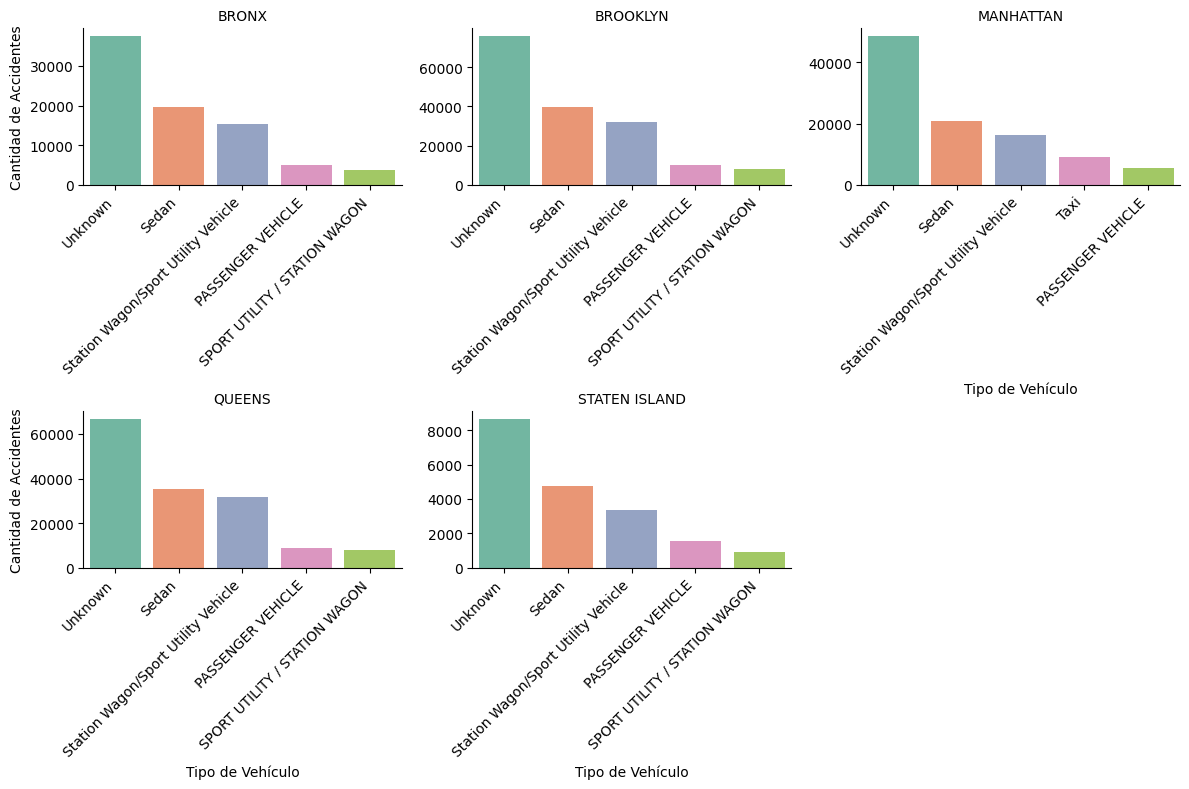

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una nueva columna con los tipos de vehículos como un conjunto (evita duplicados en el mismo accidente)
df["TIPOS_VEHICULOS"] = df[[
    "VEHICLE TYPE CODE 1", "VEHICLE TYPE CODE 2",
    "VEHICLE TYPE CODE 3", "VEHICLE TYPE CODE 4",
    "VEHICLE TYPE CODE 5"
]].apply(lambda x: set(x.dropna()), axis=1)

# Expandir la lista en filas individuales, manteniendo la relación con el municipio
df_exploded = df.explode("TIPOS_VEHICULOS")

# Contar los tipos de vehículos únicos involucrados por municipio
conteo_vehiculos = df_exploded.groupby(["BOROUGH", "TIPOS_VEHICULOS"]).size().reset_index(name="COUNT")

# Seleccionar los 5 tipos de vehículos más comunes en cada municipio
top5_por_municipio = conteo_vehiculos.sort_values(["BOROUGH", "COUNT"], ascending=[True, False])
top5_por_municipio = top5_por_municipio.groupby("BOROUGH").head(5)

# Crear una cuadrícula de gráficos con FacetGrid (uno por cada municipio)
g = sns.FacetGrid(top5_por_municipio, col="BOROUGH", col_wrap=3, sharex=False, sharey=False, height=4)

# Dibujar los gráficos de barras en la cuadrícula
g.map_dataframe(sns.barplot, x="TIPOS_VEHICULOS", y="COUNT", hue="TIPOS_VEHICULOS", dodge=False, legend=False, palette="Set2")

# Girar etiquetas del eje X 45°
for ax in g.axes.flat:
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

# Ajustar etiquetas y diseño
g.set_axis_labels("Tipo de Vehículo", "Cantidad de Accidentes")
g.set_titles(col_template="{col_name}")
plt.tight_layout()
plt.show()